# Basic EDA

In [171]:
# -*- coding: utf-8 -*-
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from collections import Counter
import matplotlib as mpl

warnings.filterwarnings('ignore')
%matplotlib inline
np.random.seed(2023)

# Read recipe inputs
df_train = pd.read_csv('new_train.csv')
df_test = pd.read_csv('new_test.csv')

# Setting
mpl.rcParams['text.color'] = 'k'
mpl.rcParams['xtick.color'] = 'k'
mpl.rcParams['ytick.color'] = 'k'
mpl.rcParams['axes.labelcolor'] = 'k'

# Variables
label_txt_col = 'medical_specialty'
label_col = 'labels'
txt_col = 'transcription'
drop_cols = ['Unnamed: 0']
stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
label_to_medical_specialty_dict = dict(df_train[['labels', 'medical_specialty']].value_counts().index)

In [172]:
# Drop index columns
df_train = df_train.drop(columns = drop_cols, axis = 1)
df_test = df_test.drop(columns = drop_cols, axis = 1)

# Process transcription length & word count
df_train['transcription_len'] = df_train['transcription'].str.len()
df_train['transcription_word_count'] = df_train['transcription'].str.split().apply(len)
df_test['transcription_len'] = df_test['transcription'].str.len()
df_test['transcription_word_count'] = df_test['transcription'].str.split().apply(len)

df_train['processed_transcription'] = df_train['transcription'].str.lower()
df_test['processed_transcription'] = df_test['transcription'].str.lower()

df_train['processed_transcription'] = df_train['processed_transcription'].apply(lambda x : ' '.join([word for word in x.split() if not word in stopwords]))
df_test['processed_transcription'] = df_test['processed_transcription'].apply(lambda x : ' '.join([word for word in x.split() if not word in stopwords]))

df_train['processed_transcription'] = df_train['processed_transcription'].str.replace('[^a-z0-9 ]', ' ').str.replace('  ', ' ').str.replace('\d+', 'N')
df_test['processed_transcription'] = df_test['processed_transcription'].str.replace('[^a-z0-9 ]', ' ').str.replace('  ', ' ').str.replace('\d+', 'N')

df_train['processed_transcription_len'] = df_train['processed_transcription'].str.len()
df_train['processed_transcription_word_count'] = df_train['processed_transcription'].str.split().apply(len)
df_test['processed_transcription_len'] = df_test['processed_transcription'].str.len()
df_test['processed_transcription_word_count'] = df_test['processed_transcription'].str.split().apply(len)

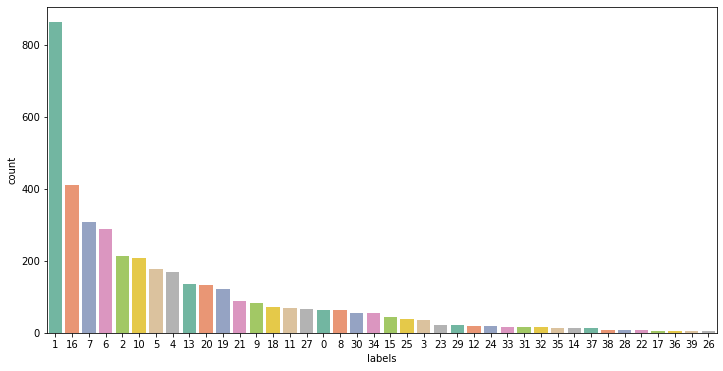

In [173]:
plt.figure(figsize = (12, 6))
ax = sns.countplot(x = df_train[label_col], linewidth = 5, palette = "Set2", order = df_train[label_col].value_counts().index)
plt.show()

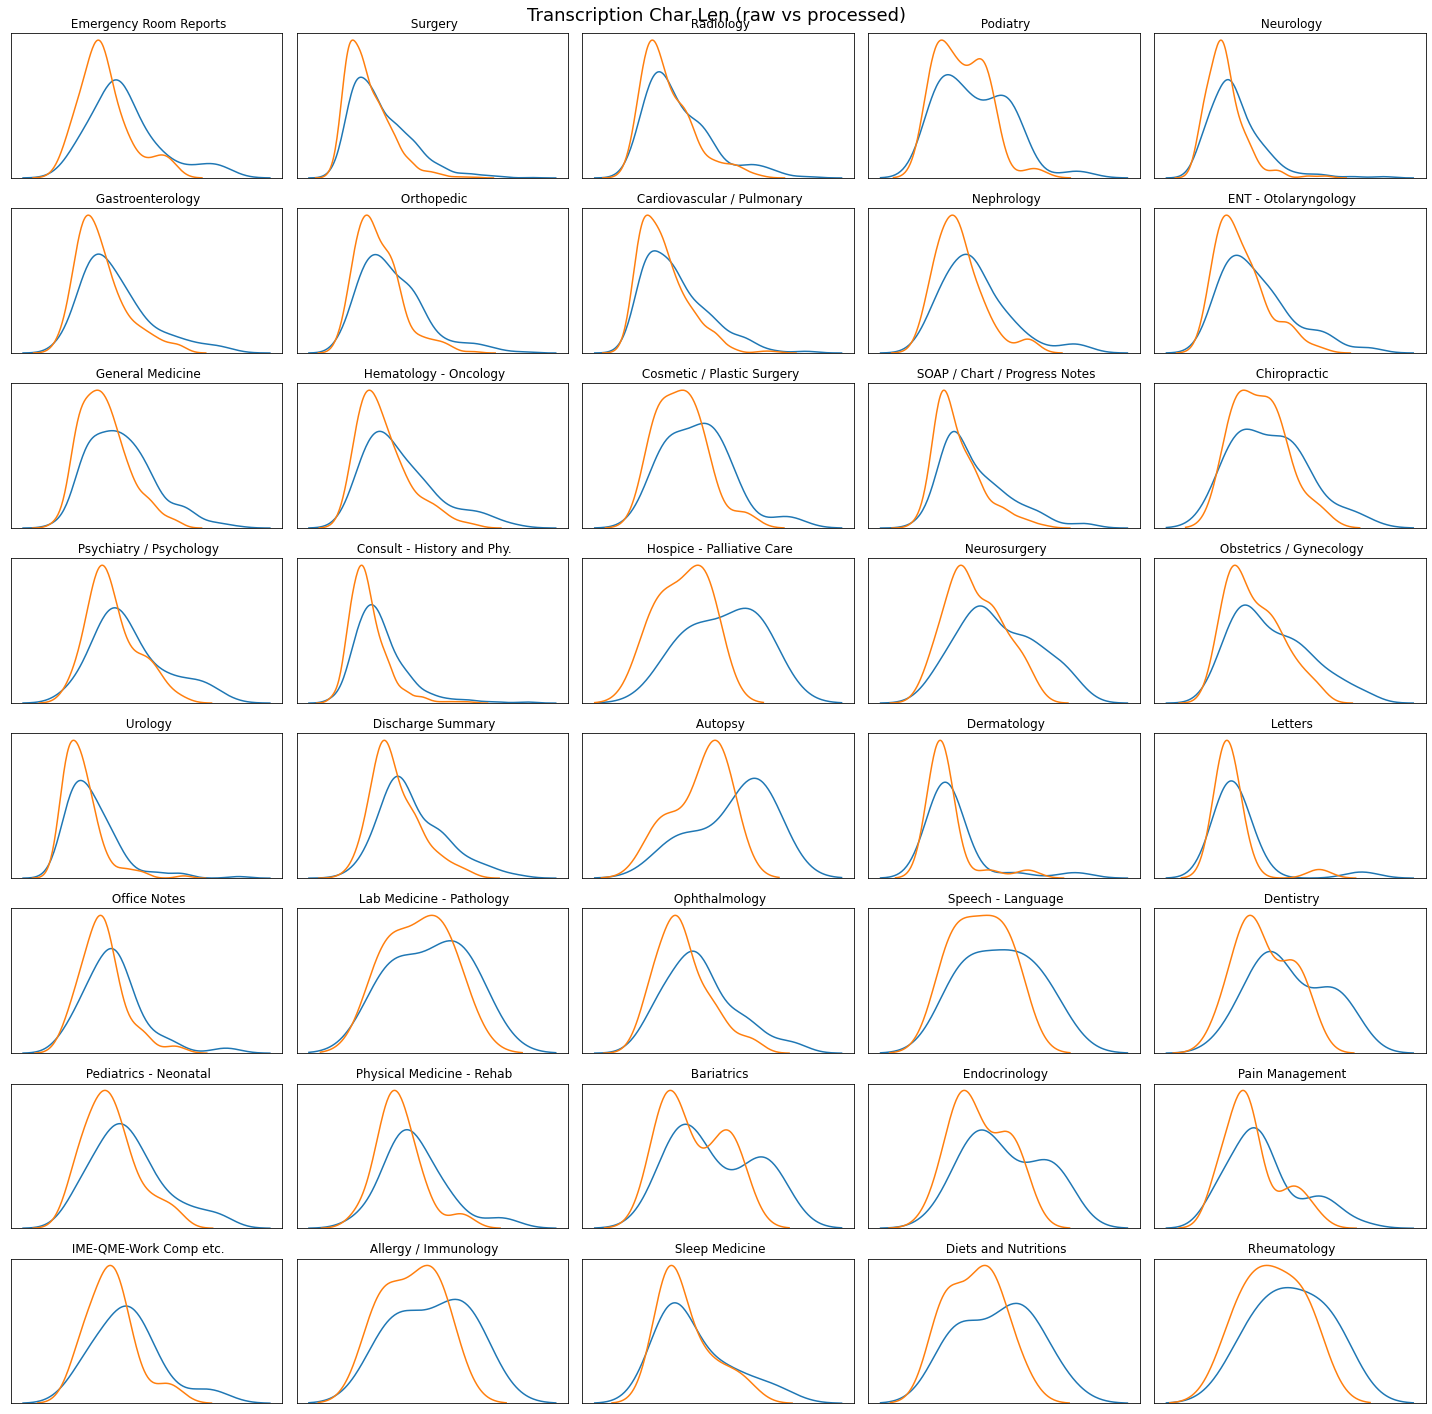

In [174]:
fig, axes = plt.subplots(8, 5,figsize = (20, 20))
fig.suptitle("Transcription Char Len (raw vs processed)", fontsize=18)
axes = axes.flatten()
for idx, ax in enumerate(axes):
    df_mask = df_train[df_train['labels'] == idx]
    sns.kdeplot(data = df_mask, x = 'transcription_len', ax = ax)
    sns.kdeplot(data = df_mask, x = 'processed_transcription_len', ax = ax)
    ax.set_xticks([]); ax.set_yticks([]); ax.set_xlabel(''); ax.set_ylabel('')
    ax.set_title(label_to_medical_specialty_dict[idx], loc = 'center', fontsize = 12)
fig.tight_layout()
plt.show()

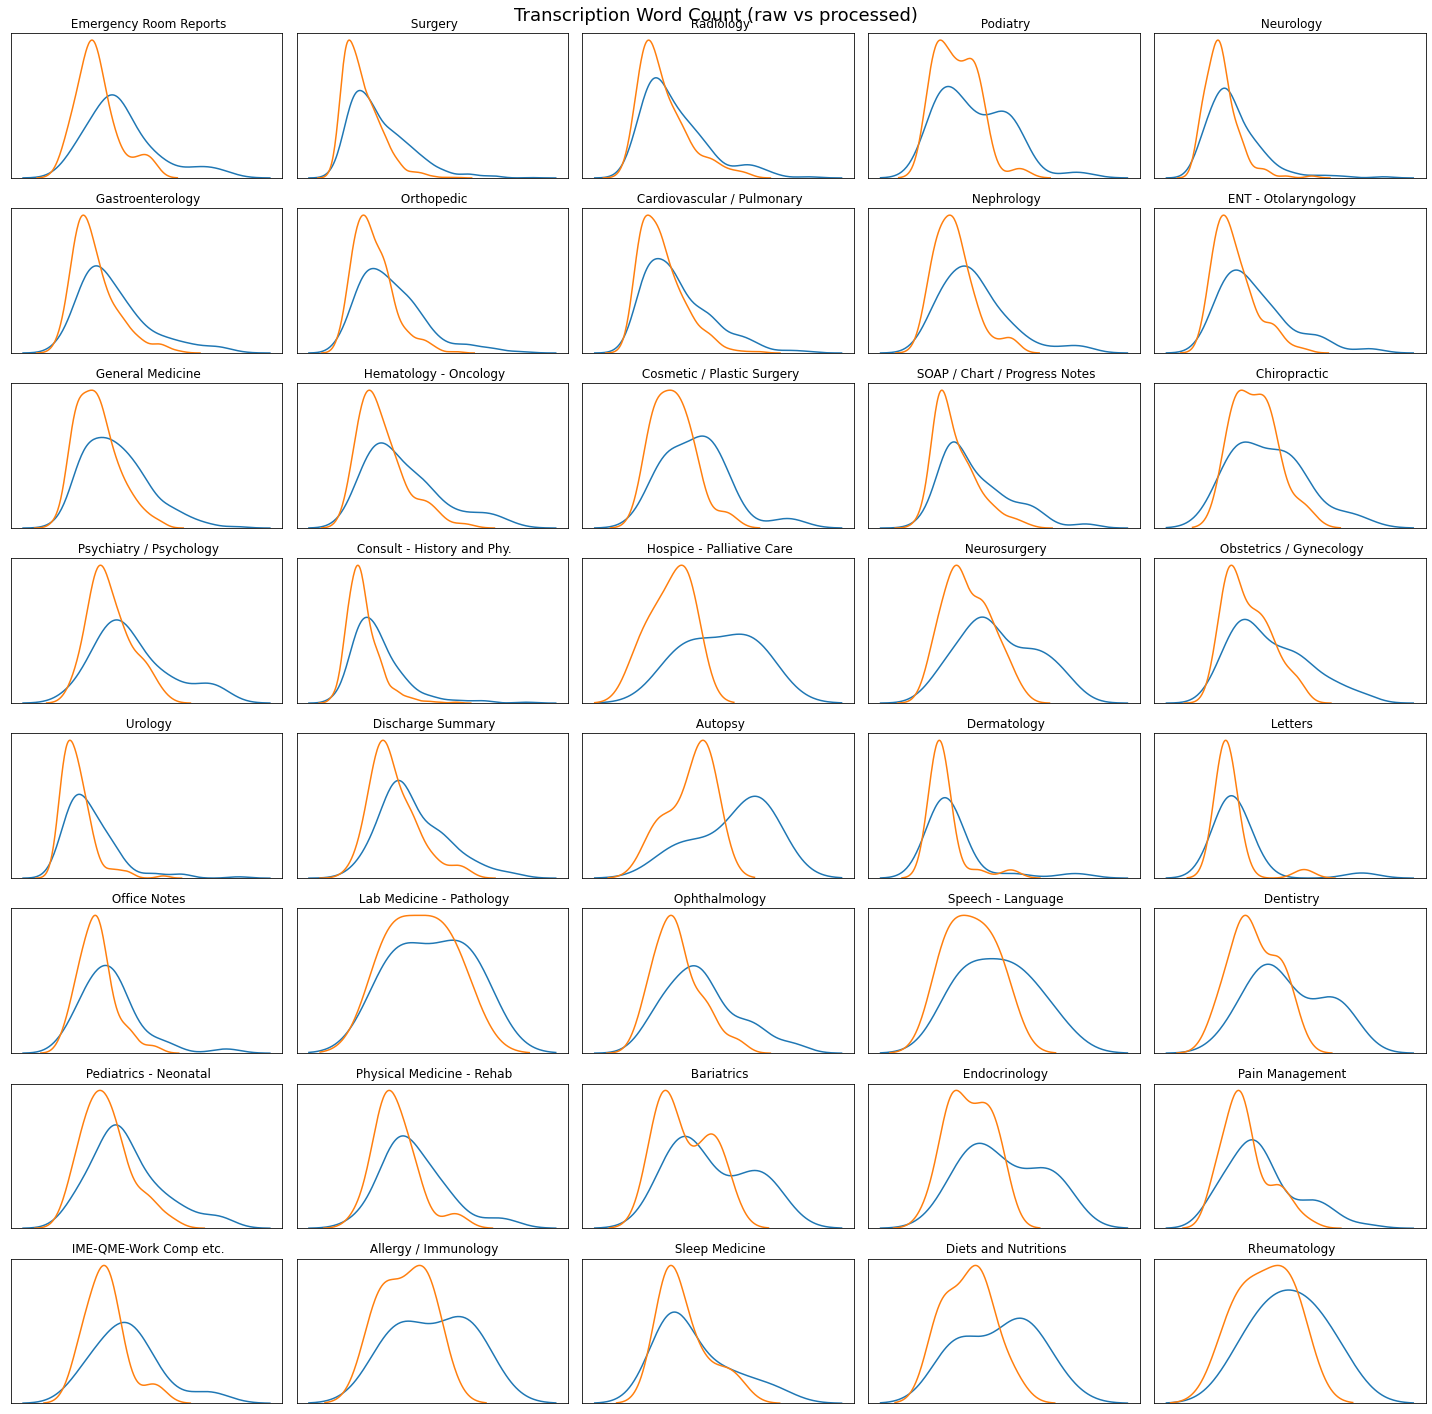

In [175]:
fig, axes = plt.subplots(8, 5,figsize = (20, 20))
fig.suptitle("Transcription Word Count (raw vs processed)", fontsize=18)
axes = axes.flatten()
for idx, ax in enumerate(axes):
    df_mask = df_train[df_train['labels'] == idx]
    sns.kdeplot(data = df_mask, x = 'transcription_word_count', ax = ax)
    sns.kdeplot(data = df_mask, x = 'processed_transcription_word_count', ax = ax)
    ax.set_xticks([]); ax.set_yticks([]); ax.set_xlabel(''); ax.set_ylabel('')
    ax.set_title(label_to_medical_specialty_dict[idx], loc = 'center', fontsize = 12)
fig.tight_layout()
plt.show()

In [176]:
# Count of Numerical string (numbers)
df_train['num_count'] = df_train['processed_transcription'].str.count('N')
df_test['num_count'] = df_test['processed_transcription'].str.count('N')

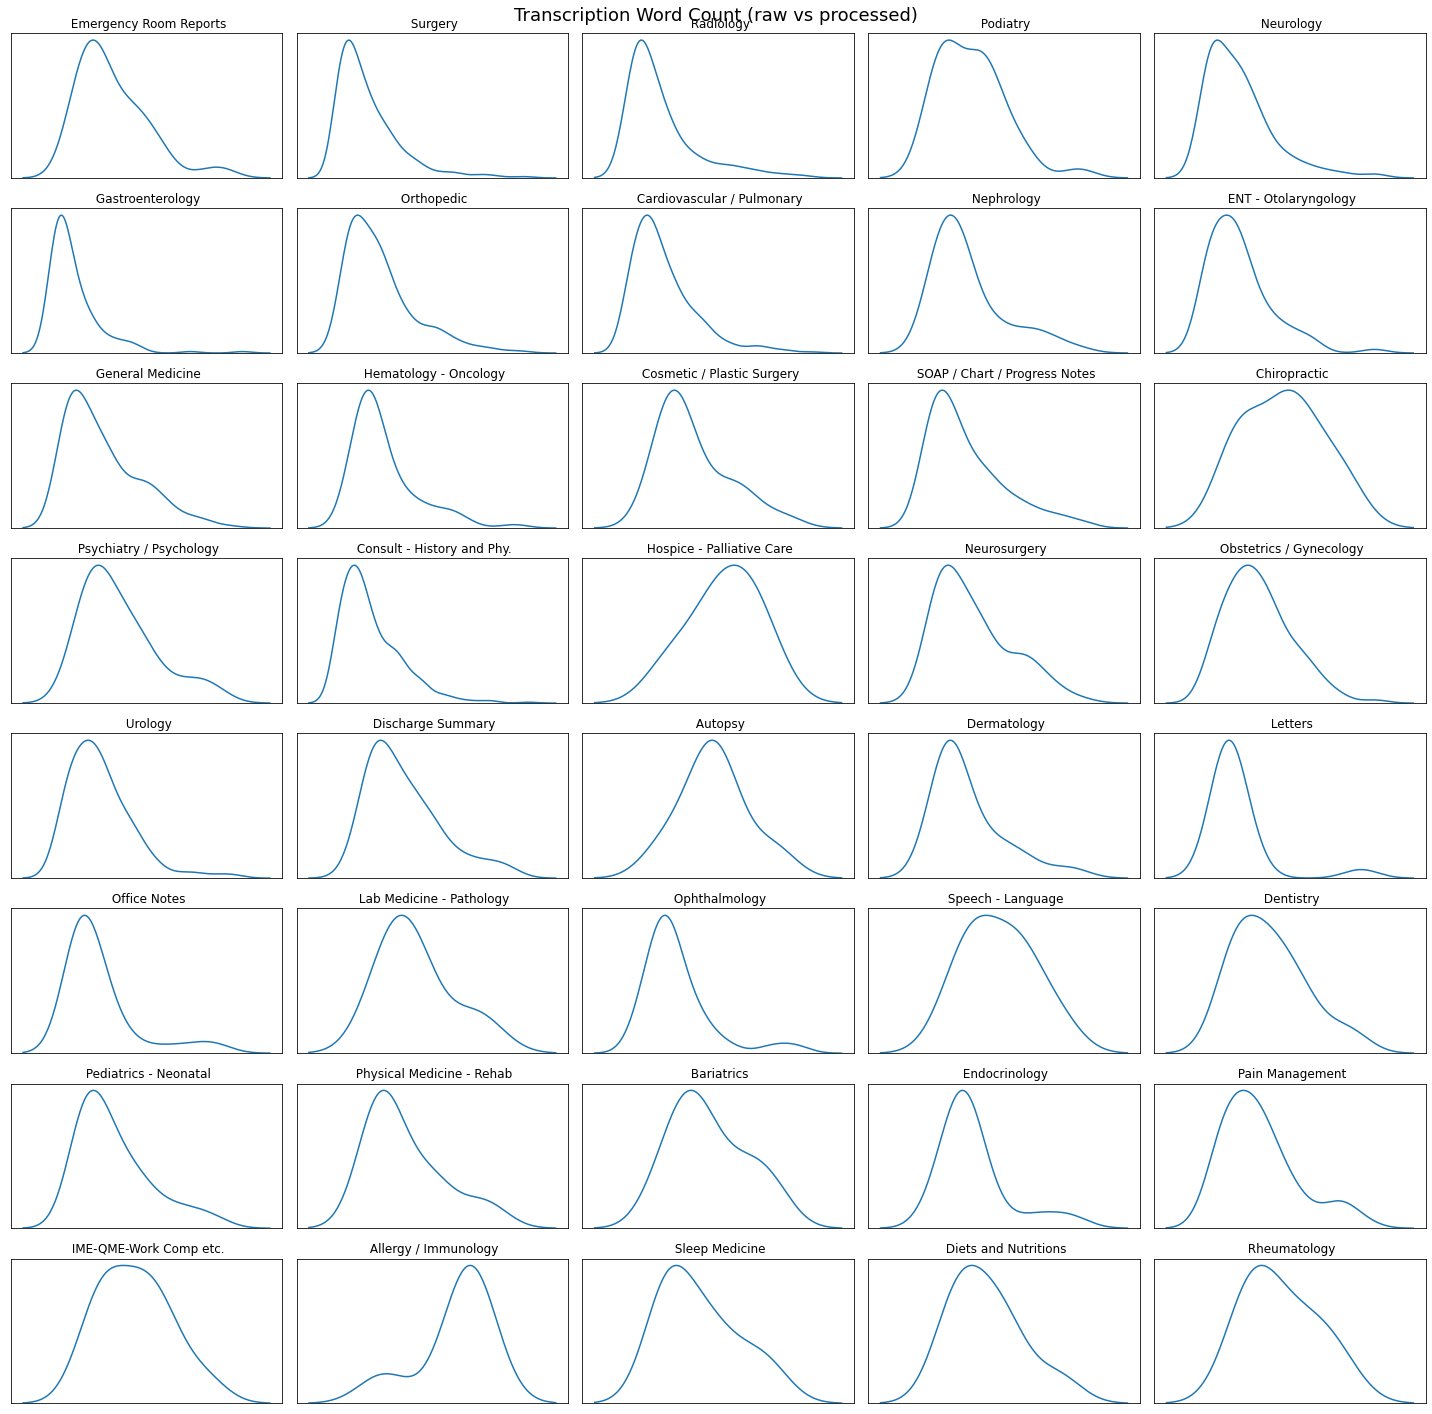

In [178]:
fig, axes = plt.subplots(8, 5,figsize = (20, 20))
fig.suptitle("Transcription Word Count (raw vs processed)", fontsize=18)
axes = axes.flatten()
for idx, ax in enumerate(axes):
    df_mask = df_train[df_train['labels'] == idx]
    sns.kdeplot(data = df_mask, x = 'num_count', ax = ax)
    ax.set_xticks([]); ax.set_yticks([]); ax.set_xlabel(''); ax.set_ylabel('')
    ax.set_title(label_to_medical_specialty_dict[idx], loc = 'center', fontsize = 12)
fig.tight_layout()
plt.show()

In [180]:
df_train['transcription'][0]

'REASON FOR THE VISIT:,  Very high PT/INR.,HISTORY: , The patient is an 81-year-old lady whom I met last month when she came in with pneumonia and CHF.  She was noticed to be in atrial fibrillation, which is a chronic problem for her.  She did not want to have Coumadin started because she said that she has had it before and the INR has had been very difficult to regulate to the point that it was dangerous, but I convinced her to restart the Coumadin again.  I gave her the Coumadin as an outpatient and then the INR was found to be 12.  So, I told her to come to the emergency room to get vitamin K to reverse the anticoagulation.,PAST MEDICAL HISTORY:,1.  Congestive heart failure.,2.  Renal insufficiency.,3.  Coronary artery disease.,4.  Atrial fibrillation.,5.  COPD.,6.  Recent pneumonia.,7.  Bladder cancer.,8.  History of ruptured colon.,9.  Myocardial infarction.,10.  Hernia repair.,11.  Colon resection.,12.  Carpal tunnel repair.,13.  Knee surgery.,MEDICATIONS:,1.  Coumadin.,2.  Simva

In [181]:
df_train['transcription'][31]

'TITLE OF OPERATION: , Ligation (clip interruption) of patent ductus arteriosus.,INDICATION FOR SURGERY: , This premature baby with operative weight of 600 grams and evidence of persistent pulmonary over circulation and failure to thrive has been diagnosed with a large patent ductus arteriosus originating in the left-sided aortic arch.  She has now been put forward for operative intervention.,PREOP DIAGNOSIS:  ,1.  Patent ductus arteriosus.,2.  Severe prematurity.,3.  Operative weight less than 4 kg (600 grams).,COMPLICATIONS: , None.,FINDINGS: , Large patent ductus arteriosus with evidence of pulmonary over circulation.  After completion of the procedure, left recurrent laryngeal nerve visualized and preserved.  Substantial rise in diastolic blood pressure.,DETAILS OF THE PROCEDURE: , After obtaining information consent, the patient was positioned in the neonatal intensive care unit, cribbed in the right lateral decubitus, and general endotracheal anesthesia was induced.  The left che